# Part I : Data Generation

## Introduction and Objective

In this part, the objective is to **generate artificial data** points that adhere to a linear distribution. These data points will be used for training a linear regression model. The model uses the equation :
$ y = w_0 + w_1 \times x + \epsilon$


where $w_0$ is the intercept, $w_ 1$ is the slope, $x$ is the feature value, and $ϵ$ is the noise term.



## Import Required Libraries


The necessary libraries are imported for this part of the code.
* **random** is used for generating random numbers.
* **matplotlib.pyplot** is used for plotting.



In [1]:
# Import required libraries
import random
import matplotlib.pyplot as plt

User Input for Linear Equation Parameters
User input is taken for the number of samples, the intercept, and the slope. These parameters will define the linear equation for generating the data.

In [2]:
# Step 0: User input for number of samples (m), intercept (w0), and slope (w1)
num_samples = int(input('Number of samples (m) = '))
num_features = 1  # For linear regression with one variable
intercept = float(input('Intercept (w0) = '))
slope = float(input('Slope (w1) = '))

Number of samples (m) = 300
Intercept (w0) = -1.3
Slope (w1) = 2.5


## Data Generation and Visualization

Using the parameters, we generate data points. We also add random noise to the ideal output to simulate real-world scenarios. Finally, we visualize the generated data.

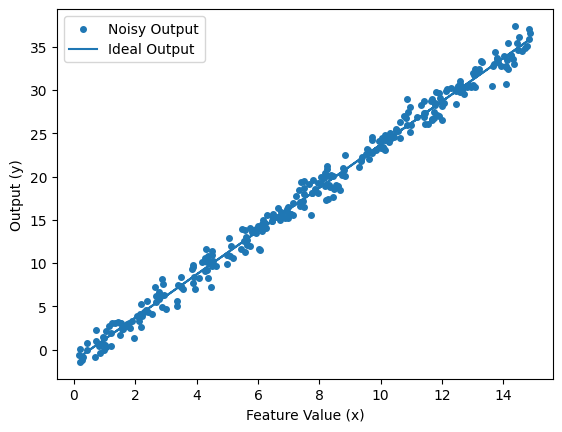

In [3]:
# Step 1: Generate feature values (x), ideal output (y_hat), and noisy output (y)
x_values = [random.random() * 15 for _ in range(num_samples)]
y_ideal = [intercept + slope * x for x in x_values]
y_noisy = [y + random.normalvariate(0, 1) for y in y_ideal]

# Step 2: Visualize the generated data
plt.figure()
plt.scatter(x_values, y_noisy, marker='o', s=16, label='Noisy Output')
plt.plot(x_values, y_ideal, label='Ideal Output')
plt.xlabel("Feature Value (x)")
plt.ylabel("Output (y)")
plt.legend()
plt.show()

## Data Export to File

In [4]:
# Step 3: Save the generated data to a file
data_file_name = input("Enter the name of the file to be created:")
with open(data_file_name, "w") as f:
    print(num_samples, file=f)
    print(num_features, file=f)
    for x, y in zip(x_values, y_noisy):
        print(f"{x}\t{y}", file=f)

print(f'File {data_file_name} has been successfully created.')

Enter the name of the file to be created:Data.txt
File Data.txt has been successfully created.


# Part II: Linear Regression

The objective of this part is to implement a linear regression model using C++. The model is trained using **batch gradient descent**. We aim to find weights $w$ that **minimize the cost function** $J(w)$.

### Creating the C++ Source File in Google Colab

**Command: `%%writefile LinearRegressionImpl.cpp`**
 This magic command writes the content of the notebook cell to a file named `LinearRegressionImpl.cpp`. This is useful for creating source code files directly within Google Colab for later compilation or execution.


In [5]:
%%writefile LinearRegressionImpl.cpp

#include <iostream>  // For standard I/O operations (e.g., cout, cin)
#include <stdlib.h>  // For standard library functions (e.g., exit, atof, atoi)
#include <string>    // For using string data type and its operations
#include <fstream>   // For file I/O operations (e.g., ifstream, ofstream)
#include <math.h>    // For mathematical functions (e.g., fabs)
#include <vector>    // For using dynamic arrays (e.g., std::vector)
#include <time.h>    // For time-related functions (not used in the current version, consider removing)

using namespace std;

// Function Prototypes
float dotProduct(float *vec1, float *vec2, int size);
float absDifference(float *vec1, float *vec2, int size); // Previously d1
float squaredDifference(float *vec1, float *vec2, int size); // Previously d2
float maxDifference(float *vec1, float *vec2, int size); // Previously dmax
void printVector(float *vec, int size, string startDelimiter = "[", string separator = ", ", string endDelimiter = "]\n");

// Main function
int main(int argc, char* argv[]) {
  // Validate command-line arguments
  if (argc < 2 || argc > 5) {
    cout << "Syntax: Program <dataFile> [learningRate] [epsilon] [maxIterations]\n";
    exit(1);
  }

  // Variable declarations
  string dataFile = argv[1];
  ifstream dataStream(argv[1]);
  int numSamples, numFeatures;
  float **featureMatrix, *actualOutput, *predictedOutput;
  float *weights;
  vector<float> costHistory;
  ofstream costFileStream("Jw.tpm");

  // Hyperparameters
  float learningRate = 0.00001F;
  if (argc > 2) learningRate = atof(argv[2]);
  double epsilon = 0.000001;
  if (argc > 3) epsilon = atof(argv[3]);
  unsigned int iteration = 0, maxIterations = 100000;
  if (argc > 4) maxIterations = atoi(argv[4]);

  // Read data from file
  dataStream >> numSamples >> numFeatures;
  featureMatrix = new float*[numSamples];
  for (int i = 0; i < numSamples; ++i) {
    featureMatrix[i] = new float[numFeatures + 2];
  }

  actualOutput = new float[numSamples];
  predictedOutput = new float[numSamples];
  for (int i = 0; i < numSamples; ++i) {
    featureMatrix[i][0] = 1;
    for (int j = 1; j <= numFeatures + 1; ++j) {
      dataStream >> featureMatrix[i][j];
    }
    actualOutput[i] = featureMatrix[i][numFeatures + 1];
  }
  dataStream.close();

  // Initialize weights and calculate initial cost
  weights = new float[numFeatures + 1];
  for (int i = 0; i <= numFeatures; ++i) {
    weights[i] = 0.0;
  }
  for (int i = 0; i < numSamples; ++i) {
    predictedOutput[i] = dotProduct(weights, featureMatrix[i], numFeatures + 1);
  }
  costHistory.push_back((1.0 / numSamples) * squaredDifference(actualOutput, predictedOutput, numSamples));

  // Training loop
  do {
    ++iteration;
    // Update weights using gradient descent
    for (int j = 0; j <= numFeatures; ++j) {
      float deltaWeight = 0.0;
      for (int i = 0; i < numSamples; ++i) {
        deltaWeight += (actualOutput[i] - predictedOutput[i]) * featureMatrix[i][j];
      }
      weights[j] += learningRate * deltaWeight;
    }

    // Calculate new cost and add to history
    for (int i = 0; i < numSamples; ++i) {
      predictedOutput[i] = dotProduct(weights, featureMatrix[i], numFeatures + 1);
    }
    costHistory.push_back((1.0 / numSamples) * squaredDifference(actualOutput, predictedOutput, numSamples));

    // Log cost every 100 iterations
    if (iteration % 100 == 0) {
      cout << "Cost at iteration " << iteration << ": " << costHistory[iteration] << endl;
      costFileStream << costHistory[iteration] << endl;
    }
  } while (fabs(costHistory[iteration - 1] - costHistory[iteration]) > epsilon && iteration < maxIterations);

  costFileStream.close();

  // Summary of training results
  cout << "\nTraining Phase Results: "
       << "\n=======================" << endl
       << "\n Number of samples: " << numSamples
       << "\n Number of features: " << numFeatures << endl
       << "\n Initial weights: all set to 0" << endl
       << "\n Initial cost: " << costHistory[0] << endl
       << "\n Number of iterations: " << iteration << endl
       << "\n Final weights: "; printVector(weights, numFeatures + 1);
  cout << "\n Final cost: " << costHistory[iteration] << endl
       << "\n Learning rate and epsilon: " << learningRate << ", " << epsilon
       << "\n To plot cost history, execute the script plotJw.py."
       << endl;

  // Generalization test (using a separate test data file)
  // (Here, add your code for reading test data and evaluating the model)

  return 0;
}

// Function Definitions

// Computes the dot product of two vectors
float dotProduct(float *vec1, float *vec2, int size) {
  float sum = 0.0;
  for (int i = 0; i < size; ++i) {
    sum += vec1[i] * vec2[i];
  }
  return sum;
}

// Computes the absolute difference between two vectors
float absDifference(float *vec1, float *vec2, int size) {
  float sum = 0.0;
  for (int i = 0; i < size; ++i) {
    sum += fabs(vec1[i] - vec2[i]);
  }
  return sum;
}

// Computes the squared difference between two vectors
float squaredDifference(float *vec1, float *vec2, int size) {
  float sum = 0.0;
  for (int i = 0; i < size; ++i) {
    float diff = vec1[i] - vec2[i];
    sum += diff * diff;
  }
  return sum;
}

// Computes the maximum absolute difference between two vectors
float maxDifference(float *vec1, float *vec2, int size) {
  float maxDiff = 0.0;
  for (int i = 0; i < size; ++i) {
    float diff = fabs(vec1[i] - vec2[i]);
    if (diff > maxDiff) maxDiff = diff;
  }
  return maxDiff;
}

// Prints a vector with optional delimiters and separator
void printVector(float *vec, int size, string startDelimiter, string separator, string endDelimiter) {
  cout << startDelimiter;
  for (int i = 0; i < size - 1; ++i) {
    cout << vec[i] << separator;
  }
  cout << vec[size - 1] << endDelimiter;
}


Writing LinearRegressionImpl.cpp


## Command Line Operations in Google Colab



### Compiling the C++ Code



In [6]:
!g++ LinearRegressionImpl.cpp -o reglin

1. **Command: `!g++ LinearRegressionImpl.cpp -o reglin`**

    - `!g++`: Invokes the GNU C++ compiler. The exclamation mark `!` is used to run shell commands in Google Colab or Jupyter Notebooks.
    - `LinearRegressionImpl.cpp`: The source C++ file to compile.
    - `-o reglin`: The `-o` flag specifies the name of the output executable, here named `reglin`.

    **Explanation**: This command compiles the C++ source file `LinearRegressionImpl.cpp` and produces an executable named `reglin`.



### Executing the Compiled Code



In [7]:
!./reglin

Syntax: Program <dataFile> [learningRate] [epsilon] [maxIterations]


2. **Command: `!./reglin`**

    - `!./`: Runs an executable in the current directory. The `!` is used to run shell commands.
    - `reglin`: The name of the executable generated from the previous compilation step.

    **Explanation**: Executes the compiled `reglin` program without any arguments. Depending on how the code is written, this might execute with default settings or produce an error asking for input arguments.



### Executing the Compiled Code with Arguments



In [8]:
!./reglin Data.txt

Cost at iteration 100: 1.44316
Cost at iteration 200: 1.38736
Cost at iteration 300: 1.33868
Cost at iteration 400: 1.29621
Cost at iteration 500: 1.25915
Cost at iteration 600: 1.22683
Cost at iteration 700: 1.19863
Cost at iteration 800: 1.17403
Cost at iteration 900: 1.15256
Cost at iteration 1000: 1.13384
Cost at iteration 1100: 1.1175
Cost at iteration 1200: 1.10325
Cost at iteration 1300: 1.09081
Cost at iteration 1400: 1.07997
Cost at iteration 1500: 1.0705
Cost at iteration 1600: 1.06225
Cost at iteration 1700: 1.05505
Cost at iteration 1800: 1.04876
Cost at iteration 1900: 1.04328
Cost at iteration 2000: 1.0385
Cost at iteration 2100: 1.03433
Cost at iteration 2200: 1.03069
Cost at iteration 2300: 1.02751
Cost at iteration 2400: 1.02474
Cost at iteration 2500: 1.02232
Cost at iteration 2600: 1.02021
Cost at iteration 2700: 1.01838
Cost at iteration 2800: 1.01677
Cost at iteration 2900: 1.01537
Cost at iteration 3000: 1.01415
Cost at iteration 3100: 1.01308
Cost at iteration 32

3. **Command: `!./reglin Data.txt`**

    - `!./reglin`: Runs the `reglin` executable.
    - `Data.txt`: An argument passed to the `reglin` executable, likely the name of the data file.

    **Explanation**: Executes the `reglin` program and passes `Data.txt` as an argument. This is likely the name of the file containing the dataset to be used for linear regression.


# Part 3 : Visualization of Error



## Objective

The objective of this section is to visualize the error as the model is trained. The error values are stored in a file, and this Python code reads those values and plots them to help in understanding how well the model is learning.



## Mathematical Background

The error term is essentially the value of the cost function, which in the context of linear regression is often the Mean Squared Error (MSE). The formula for MSE is:

$$
\text{MSE} = \frac{1}{\text{numSamples}} \sum_{i=1}^{\text{numSamples}} (\text{predictedOutput}[i] - \text{actualOutput}[i])^2
$$

Here, `numSamples` is the number of data samples, and `predictedOutput` and `actualOutput` are the predicted and actual outputs, respectively.




## Python Code for Error Visualization

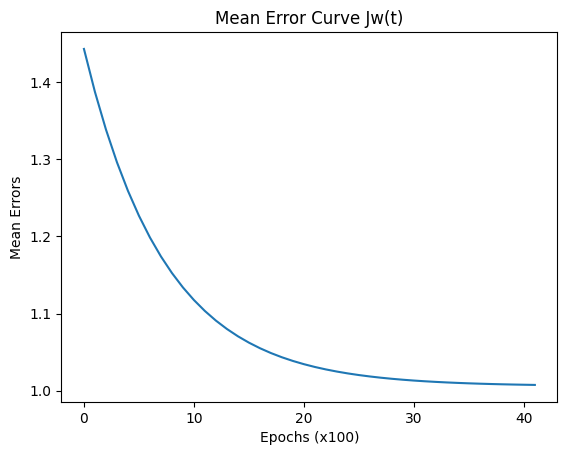

In [10]:
import matplotlib.pyplot as plt

def read_error_data(file_name):
    """
    Reads error data from a file and returns it as a list of floats.

    Parameters:
        file_name (str): Name of the file containing error data.

    Returns:
        list: A list of error values as floats.
    """
    with open(file_name, 'r') as file:
        return [float(line.strip()) for line in file.readlines()]

def plot_error_curve(time_stamps, errors):
    """
    Plots the error curve using matplotlib.

    Parameters:
        time_stamps (list): A list of time stamps or epochs.
        errors (list): A list of error values.

    Returns:
        None: Shows the plot.
    """
    plt.figure()
    plt.plot(time_stamps, errors)
    plt.xlabel('Epochs (x100)')
    plt.ylabel('Mean Errors')
    plt.title('Mean Error Curve Jw(t)')
    plt.show()

if __name__ == '__main__':
    # Step 1: Read error data from the file
    error_data_file = 'Jw.tpm'
    mean_errors = read_error_data(error_data_file)

    # Step 2: Create time stamps for plotting
    epochs = [i for i in range(len(mean_errors))]

    # Step 3: Plot the mean error curve
    plot_error_curve(epochs, mean_errors)
